Choose the device.

In [1]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

Create a buffer and feed it.

Build the model.

In [2]:
from go_explore.vae import Linear_VQ_VAE

vae = Linear_VQ_VAE(16).to(device)

/home/qgallouedec/go-explore/env/lib/python3.8/site-packages/torchvision/transforms/functional_pil.py:228: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  interpolation: int = Image.BILINEAR,
/home/qgallouedec/go-explore/env/lib/python3.8/site-packages/torchvision/transforms/functional_pil.py:295: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
/home/qgallouedec/go-explore/env/lib/python3.8/site-packages/torchvision/transforms/functional_pil.py:328: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  interpolation: int = Image.BICUBIC,


## Test the VAE

Sample a batch of observations.

In [3]:
def sample(batch_size):
    batch = torch.ones(batch_size, 16) * torch.rand(batch_size, 1)
    return batch.to(device)


input = sample(10)
input

tensor([[0.3572, 0.3572, 0.3572, 0.3572, 0.3572, 0.3572, 0.3572, 0.3572, 0.3572,
         0.3572, 0.3572, 0.3572, 0.3572, 0.3572, 0.3572, 0.3572],
        [0.9891, 0.9891, 0.9891, 0.9891, 0.9891, 0.9891, 0.9891, 0.9891, 0.9891,
         0.9891, 0.9891, 0.9891, 0.9891, 0.9891, 0.9891, 0.9891],
        [0.2180, 0.2180, 0.2180, 0.2180, 0.2180, 0.2180, 0.2180, 0.2180, 0.2180,
         0.2180, 0.2180, 0.2180, 0.2180, 0.2180, 0.2180, 0.2180],
        [0.6380, 0.6380, 0.6380, 0.6380, 0.6380, 0.6380, 0.6380, 0.6380, 0.6380,
         0.6380, 0.6380, 0.6380, 0.6380, 0.6380, 0.6380, 0.6380],
        [0.6300, 0.6300, 0.6300, 0.6300, 0.6300, 0.6300, 0.6300, 0.6300, 0.6300,
         0.6300, 0.6300, 0.6300, 0.6300, 0.6300, 0.6300, 0.6300],
        [0.9757, 0.9757, 0.9757, 0.9757, 0.9757, 0.9757, 0.9757, 0.9757, 0.9757,
         0.9757, 0.9757, 0.9757, 0.9757, 0.9757, 0.9757, 0.9757],
        [0.3262, 0.3262, 0.3262, 0.3262, 0.3262, 0.3262, 0.3262, 0.3262, 0.3262,
         0.3262, 0.3262, 0.3262, 0.32

Build the reconstruction.

In [4]:
recons, vq_loss, perplexity = vae(input)

Visualize the result.

In [5]:
input, recons

(tensor([[0.3572, 0.3572, 0.3572, 0.3572, 0.3572, 0.3572, 0.3572, 0.3572, 0.3572,
          0.3572, 0.3572, 0.3572, 0.3572, 0.3572, 0.3572, 0.3572],
         [0.9891, 0.9891, 0.9891, 0.9891, 0.9891, 0.9891, 0.9891, 0.9891, 0.9891,
          0.9891, 0.9891, 0.9891, 0.9891, 0.9891, 0.9891, 0.9891],
         [0.2180, 0.2180, 0.2180, 0.2180, 0.2180, 0.2180, 0.2180, 0.2180, 0.2180,
          0.2180, 0.2180, 0.2180, 0.2180, 0.2180, 0.2180, 0.2180],
         [0.6380, 0.6380, 0.6380, 0.6380, 0.6380, 0.6380, 0.6380, 0.6380, 0.6380,
          0.6380, 0.6380, 0.6380, 0.6380, 0.6380, 0.6380, 0.6380],
         [0.6300, 0.6300, 0.6300, 0.6300, 0.6300, 0.6300, 0.6300, 0.6300, 0.6300,
          0.6300, 0.6300, 0.6300, 0.6300, 0.6300, 0.6300, 0.6300],
         [0.9757, 0.9757, 0.9757, 0.9757, 0.9757, 0.9757, 0.9757, 0.9757, 0.9757,
          0.9757, 0.9757, 0.9757, 0.9757, 0.9757, 0.9757, 0.9757],
         [0.3262, 0.3262, 0.3262, 0.3262, 0.3262, 0.3262, 0.3262, 0.3262, 0.3262,
          0.3262, 0.3262

## Train the model

Create a loss function.

In [6]:
import torch.nn.functional as F
from typing import Tuple
from torch import Tensor


def loss_func(inputs: Tensor, recons: Tensor, vq_loss: Tensor) -> Tuple[Tensor, Tensor]:
    # Reconstruction loss
    recons_loss = F.mse_loss(inputs, recons)  # / data_variance

    # Total loss
    loss = recons_loss + 0.1 * vq_loss

    return loss, recons_loss

Test the loss function.

In [7]:
loss_func(input, recons, vq_loss)

(tensor(0.3746, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(0.3689, device='cuda:0', grad_fn=<MseLossBackward0>))

Create optimizer.

In [8]:
from torch import optim

optimizer = optim.Adam(vae.parameters(), lr=1e-3)

In [9]:
perplexities = []
for epoch in range(5000):
    # Sample
    input = sample(128)

    # Compute the output image
    vae.train()
    recons, vq_loss, perplexity = vae(input)

    # Compute the loss
    loss, recons_loss = loss_func(input, recons, vq_loss)

    # Step the optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    perplexities.append(perplexity.item())

    if epoch % 1000 == 0:
        print(
            "epoch: {:5d}\tloss: {:.5f}\trecons loss: {:.5f}\tvq loss: {:.5f}".format(
                epoch, loss.item(), recons_loss.item(), vq_loss.item()
            ),
        )
        vae.eval()

epoch:     0	loss: 0.31157	recons loss: 0.30634	vq loss: 0.05225
epoch:  1000	loss: 0.02290	recons loss: 0.00598	vq loss: 0.16912
epoch:  2000	loss: 0.00676	recons loss: 0.00318	vq loss: 0.03580
epoch:  3000	loss: 0.00773	recons loss: 0.00236	vq loss: 0.05368
epoch:  4000	loss: 0.00734	recons loss: 0.00223	vq loss: 0.05104


In [10]:
input = sample(10)
recons, vq_loss, perplexity = vae(input)
F.mse_loss(input, recons)
recons

tensor([[0.9116, 0.9108, 0.9094, 0.9104, 0.9100, 0.9104, 0.9112, 0.9112, 0.9067,
         0.9085, 0.9063, 0.9076, 0.9108, 0.9116, 0.9094, 0.9101],
        [0.3115, 0.3156, 0.3156, 0.3154, 0.3112, 0.3140, 0.3214, 0.3107, 0.3179,
         0.3139, 0.3172, 0.3300, 0.3177, 0.3111, 0.3159, 0.3167],
        [0.1200, 0.1202, 0.1182, 0.1201, 0.1222, 0.1209, 0.1161, 0.1203, 0.1189,
         0.1185, 0.1216, 0.1140, 0.1185, 0.1217, 0.1218, 0.1207],
        [0.5849, 0.5870, 0.5793, 0.5865, 0.5824, 0.5884, 0.5841, 0.5851, 0.5758,
         0.5787, 0.5760, 0.5766, 0.5793, 0.5907, 0.5830, 0.5860],
        [0.9116, 0.9108, 0.9094, 0.9104, 0.9100, 0.9104, 0.9112, 0.9112, 0.9067,
         0.9085, 0.9063, 0.9076, 0.9108, 0.9116, 0.9094, 0.9101],
        [0.3115, 0.3156, 0.3156, 0.3154, 0.3112, 0.3140, 0.3214, 0.3107, 0.3179,
         0.3139, 0.3172, 0.3300, 0.3177, 0.3111, 0.3159, 0.3167],
        [0.1200, 0.1202, 0.1182, 0.1201, 0.1222, 0.1209, 0.1161, 0.1203, 0.1189,
         0.1185, 0.1216, 0.1140, 0.11

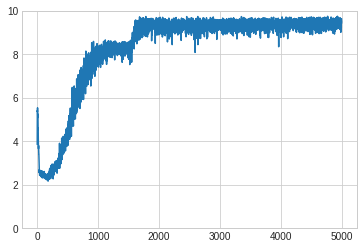

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")
import numpy as np

fig = plt.figure()
ax = plt.axes()
ax.set_ylim(0, 10)

ax.plot(perplexities);

In [12]:
from go_explore.cells import get_param_score

input = sample(512)

# Compute the output image
vae.eval()
quantized = vae.get_quantized(input)
get_param_score(quantized)

0.6601027686835504

In [13]:
input = sample(10)
input, vae(input)[0]

(tensor([[0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302,
          0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302, 0.1302],
         [0.3819, 0.3819, 0.3819, 0.3819, 0.3819, 0.3819, 0.3819, 0.3819, 0.3819,
          0.3819, 0.3819, 0.3819, 0.3819, 0.3819, 0.3819, 0.3819],
         [0.5118, 0.5118, 0.5118, 0.5118, 0.5118, 0.5118, 0.5118, 0.5118, 0.5118,
          0.5118, 0.5118, 0.5118, 0.5118, 0.5118, 0.5118, 0.5118],
         [0.0394, 0.0394, 0.0394, 0.0394, 0.0394, 0.0394, 0.0394, 0.0394, 0.0394,
          0.0394, 0.0394, 0.0394, 0.0394, 0.0394, 0.0394, 0.0394],
         [0.4181, 0.4181, 0.4181, 0.4181, 0.4181, 0.4181, 0.4181, 0.4181, 0.4181,
          0.4181, 0.4181, 0.4181, 0.4181, 0.4181, 0.4181, 0.4181],
         [0.3309, 0.3309, 0.3309, 0.3309, 0.3309, 0.3309, 0.3309, 0.3309, 0.3309,
          0.3309, 0.3309, 0.3309, 0.3309, 0.3309, 0.3309, 0.3309],
         [0.1544, 0.1544, 0.1544, 0.1544, 0.1544, 0.1544, 0.1544, 0.1544, 0.1544,
          0.1544, 0.1544

In [14]:
vae.encode(input)

tensor([[ 1.6518,  1.1861, -1.5594,  1.4129],
        [ 0.7040,  0.0131, -0.5563,  0.9841],
        [ 0.1792, -0.5676, -0.0130,  0.7006],
        [ 1.9939,  1.6095, -1.9215,  1.5676],
        [ 0.5673, -0.1560, -0.4117,  0.9223],
        [ 0.8960,  0.2507, -0.7595,  1.0710],
        [ 1.5606,  1.0733, -1.4629,  1.3716],
        [-0.2400, -1.0060,  0.4165,  0.4571],
        [ 0.8060,  0.1393, -0.6642,  1.0302],
        [-0.7811, -1.5717,  0.9709,  0.1427]], device='cuda:0',
       grad_fn=<AddmmBackward0>)